# Projet IA.
## Livrable code


|Auteur|Modification|
|---|---|
|Majorel Pierre|2023/03/13|
|Alami Ouali Othmane|2023/03/13|
|Lopez Daniel|2023/03/13|

### Préparation de l'environnement

Ci-dessous quelques imports et précautions préalables à notre travail.

In [ ]:
!pip install numpy
!pip install pandas
!pip install sklearn
!pip install seaborn

In [ ]:
# import
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = r"." #changez ce chemin en fonction de votre dossier
CHAPTER_ID = "images"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Images_Projet", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Import des données

Il convient d'automatiser l'import des données. On va implémenter une fonction qui se charge de :
* télécharger l'archive
* extraire les fichiers

On peut maintenant importer les données :

### Chargement des données en mémoire

#### Nous commençons par lire nos données contenues dans notre fichier csv 

In [ ]:
import pandas as pd
import seaborn as sns 

def load_donnees_data():
    csv_path = "Donnees_triees.csv"
    return pd.read_csv(csv_path,sep=";", encoding = "ISO-8859-1")

donnees = load_donnees_data()

#### Nous regardons ensuite si certaines données sont manquantes afin de pouvoir les remplacer par la suite

In [ ]:
def count_na_by_column(df):
    na_count = df.isna().sum()
    return na_count

# Compter le nombre de valeurs manquantes par colonne
na_count = count_na_by_column(donnees)
# Afficher le nombre de valeurs manquantes par colonne
print(na_count)

#### Il y a des données manquantes, nous allons donc remplir ces valeurs manquantes par la médiane des valeurs de la colonne qui leur est associée

In [ ]:
donnees = donnees.fillna(donnees.median())

#### Ici, nous vérifions qu'il n'y a plus de valeurs manquantes

In [ ]:
# Compter le nombre de valeurs manquantes par colonne
na_count = count_na_by_column(donnees)

# Afficher le nombre de valeurs manquantes par colonne
print(na_count)

#### Nous affichons maintenant nos données pour vérifier qu'elles sont lues correctement

In [ ]:
donnees.head()

In [ ]:
donnees.info()

### Visualisation des données

#### Nous transformons les données non ordinales à l'aide du 1hotencoder

In [ ]:
donnees_cat = donnees[["Department","JobRole"]]
donnees_cat.head(10)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
donnees_cat_1hot = cat_encoder.fit_transform(donnees_cat)
donnees_cat_1hot # array creux par défaut

In [ ]:
end_prepared_DF = pd.DataFrame(donnees_cat_1hot, columns=Column)

#### Nous affichons un histogramme par attribut numérique

In [ ]:
donnees.hist(bins=50, figsize=(20,15))

#### Nous affichons des boîtes à moustaches

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['Age'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['BusinessTravel'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['DistanceFromHome'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['Education'], grid = False, ax=ax4)
donnees.boxplot(by ='Attrition', column =['HeureMoyJour2'], grid = False, ax=ax5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['JobLevel'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['MonthlyIncome'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['NumCompaniesWorked'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['PercentSalaryHike'], grid = False, ax=ax4)
donnees.boxplot(by ='Attrition', column =['StockOptionLevel'], grid = False, ax=ax5)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['TotalWorkingYears'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['TrainingTimesLastYear'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['YearsAtCompany'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['YearsSinceLastPromotion'], grid = False, ax=ax4)
donnees.boxplot(by ='Attrition', column =['YearsWithCurrManager'], grid = False, ax=ax5)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 5))
fig.subplots_adjust(wspace=0.2)
donnees.boxplot(by ='Attrition', column =['EnvironmentSatisfaction'], grid = False, ax=ax1) 
donnees.boxplot(by ='Attrition', column =['WorkLifeBalance'], grid = False, ax=ax2)
donnees.boxplot(by ='Attrition', column =['JobInvolvement'], grid = False, ax=ax3)
donnees.boxplot(by ='Attrition', column =['Nombre de jour travailles'], grid = False, ax=ax4)

#### Nous effectuons ensuite une matrice de corrélation

<AxesSubplot:>

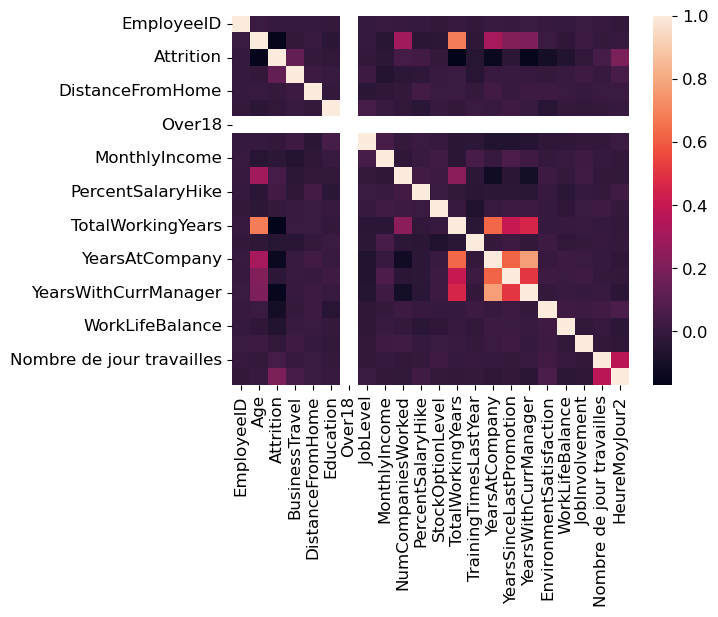

In [93]:
donnees_heatmap = donnees[['Attrition','Age','MonthlyIncome','DistanceFromHome','TotalWorkingYears','YearsAtCompany','Education','NumCompaniesWorked']]
corr = donnees.corr()
sns.heatmap(corr)

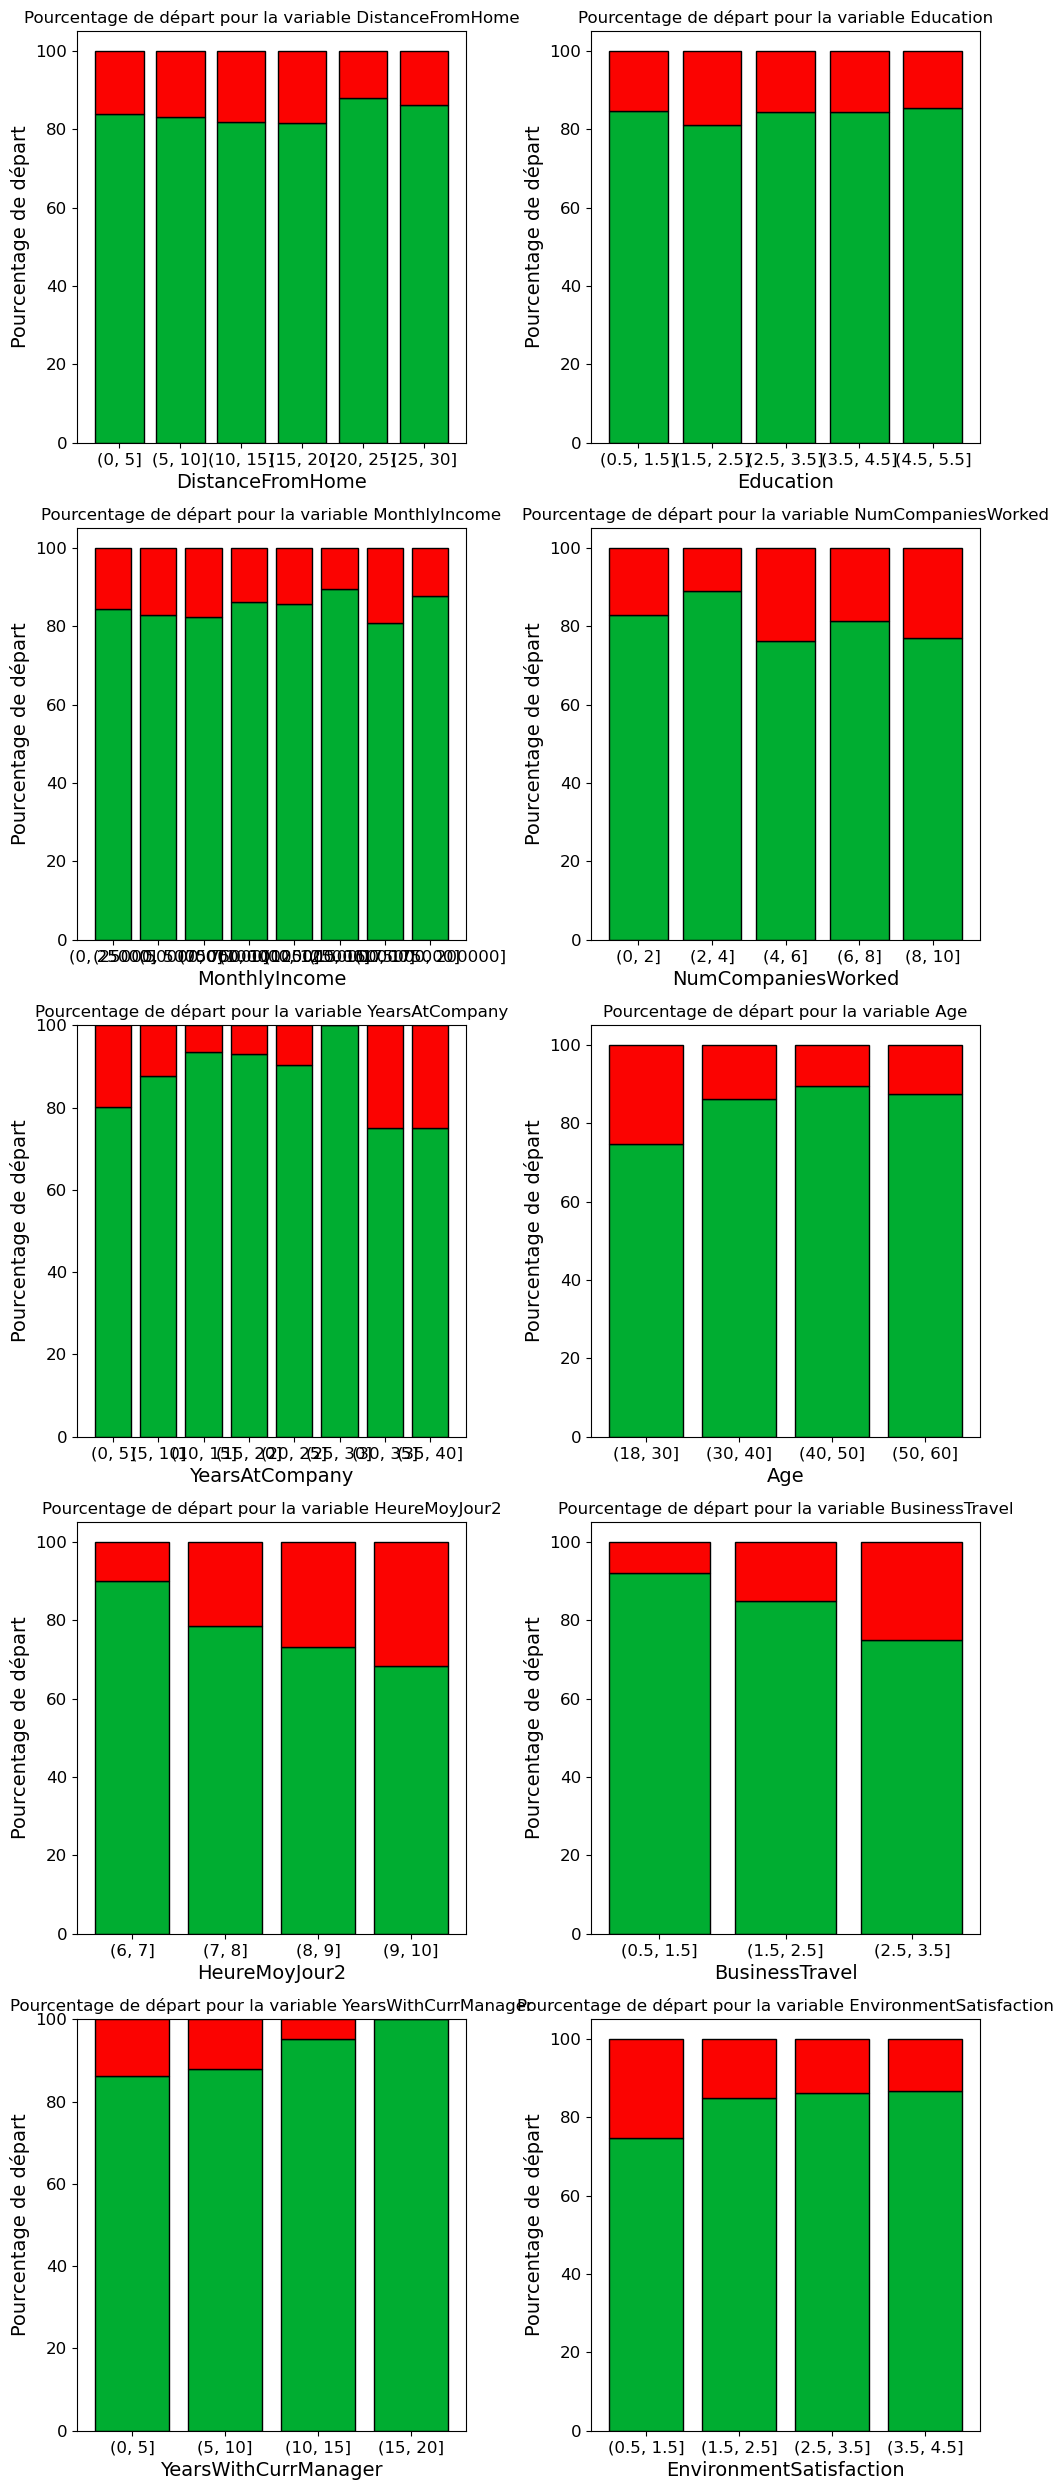

In [94]:
# Liste des variables pour lesquelles on veut afficher les pourcentages de départ
variables = ['DistanceFromHome','Education', 'MonthlyIncome','NumCompaniesWorked', 'YearsAtCompany','Age','HeureMoyJour2','BusinessTravel','YearsWithCurrManager','EnvironmentSatisfaction']

# Définition des tranches pour chaque variable
bins = {
    'DistanceFromHome': [0, 5, 10, 15, 20, 25, 30],
    'Education': [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
    'MonthlyIncome': [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000],
    'NumCompaniesWorked': [0, 2, 4, 6, 8, 10],
    'YearsAtCompany': [0, 5, 10, 15, 20, 25, 30, 35, 40],
    'Age': [18, 30, 40, 50, 60],
    'HeureMoyJour2' :[6, 7, 8, 9, 10],
    'BusinessTravel':[0.5, 1.5, 2.5, 3.5],
    'YearsWithCurrManager':[0, 5, 10, 15, 20],
    'EnvironmentSatisfaction':[0.5, 1.5, 2.5, 3.5, 4.5]
}
# Calcul du nombre total de variables
n_variables = len(variables)

# Calcul du nombre de lignes et de colonnes pour l'affichage des graphiques
n_cols = min(n_variables, 2)
n_rows = int(np.ceil(n_variables / n_cols))

# Création des graphiques
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 5 * n_rows))

# Affichage des graphiques pour chaque variable
for i, var in enumerate(variables):
    # Calcul des indices de ligne et de colonne pour le graphique courant
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Sélection des données pour la variable en cours
    donnees_var = donnees[['Attrition', var]]
    
    # Calcul du nombre d'employés pour chaque tranche de la variable et chaque catégorie d'attrition
    grouped_data = donnees_var.groupby([pd.cut(donnees_var[var], bins[var]), 'Attrition'])[var].count().unstack()
    
    # Conversion des nombres en pourcentages
    attrition_rates = grouped_data.apply(lambda x: x / x.sum() * 100, axis=1)
    
    # Affichage de l'histogramme empilé correspondant à la variable en cours
    axs[row_idx, col_idx].bar(attrition_rates.index.astype(str), attrition_rates[0], color='#00AD31', edgecolor='black')
    axs[row_idx, col_idx].bar(attrition_rates.index.astype(str), attrition_rates[1], bottom=attrition_rates[0], color='#FB0301', edgecolor='black')
    
    # Ajout de titres et d'étiquettes
    axs[row_idx, col_idx].set_xlabel(var)
    axs[row_idx, col_idx].set_ylabel('Pourcentage de départ')
    axs[row_idx, col_idx].set_title('Pourcentage de départ pour la variable {}'.format(var))
    
# Ajustement de l'espacement entre les graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()

Saving figure scatter_matrix_plot


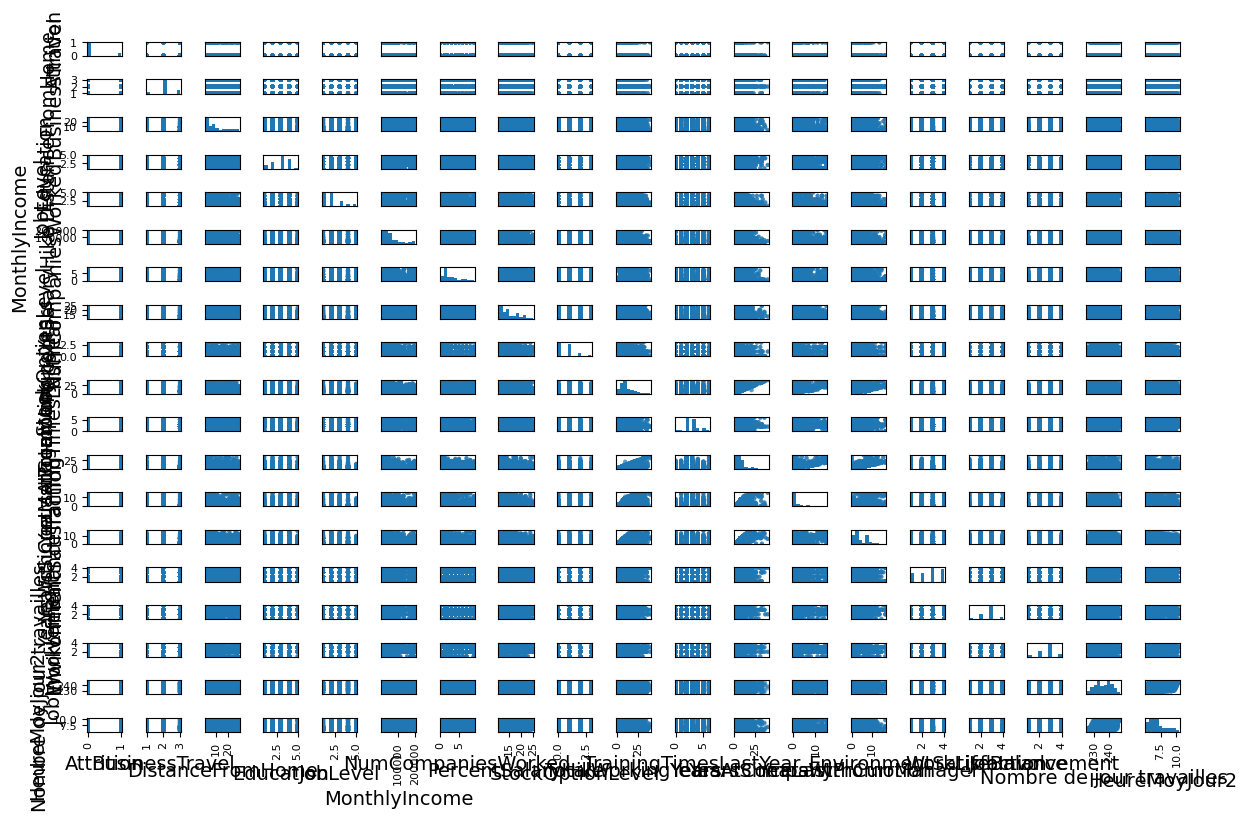

In [95]:
from pandas.plotting import scatter_matrix

attributes = ["Attrition","BusinessTravel","Department","DistanceFromHome","Education","JobLevel","JobRole","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager","EnvironmentSatisfaction","WorkLifeBalance","JobInvolvement","HeureMoyJour","Nombre de jour travailles",
              "HeureMoyJour2"]
scatter_matrix(donnees[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

### Création de la pipeline

In [99]:
# Import des modules nécessaires
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

donnees_labels = donnees["Attrition"].copy()
donnees = donnees.drop("Attrition", axis=1)

donnees_num = donnees.select_dtypes(include=[np.number]) 
num_attribs = list(donnees_num)
cat_attribs = ["BusinessTravel", "JobLevel", "JobRole", "Over18"]


# Pipelines de préparation de données numériques et catégorielles
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])
cat_pipeline = Pipeline([
    ('onehot_encoder', OneHotEncoder()),
])

# ColumnTransformer pour assembler les deux pipelines
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

# Données préparées
prepared_data = full_pipeline.fit_transform(donnees)

KeyError: 'Attrition'

### Séparation du jeu de donnée

Ici nous allons couper notre jeu de données en deux 
* 1) Le train set
* 2) Le test set

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(donnees, donnees["Attrition"]):
    strat_train_set = donnees.loc[train_index]
    strat_test_set = donnees.loc[test_index]

for set_ in (strat_train_set, strat_test_set):
    set_.drop("Attrition", axis=1, inplace=True)

donnees = strat_train_set.copy()

In [98]:
strat_train_set.head()

,EmployeeID,Age,BusinessTravel,Department,DistanceFromHome,Education,Over18,JobLevel,JobRole,MonthlyIncome,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,WorkLifeBalance,JobInvolvement,HeureMoyJour,Nombre de jour travailles,HeureMoyJour2
3465,3466,41,2,Sales,1,4,1,1,Research Director,52570,...,2,10,0,8,2.0,3.0,4,07:18:13,241,7.303611
3485,3486,34,1,Sales,1,1,1,2,Research Director,26960,...,3,0,0,0,3.0,3.0,3,06:30:53,240,6.514722
3052,3053,21,2,Human Resources,10,2,1,1,Laboratory Technician,53730,...,2,1,0,0,3.0,3.0,3,05:33:59,243,5.566389
2012,2013,28,3,Research & Development,7,3,1,2,Manager,29760,...,3,1,0,0,1.0,3.0,3,05:42:13,237,5.703611
426,427,40,2,Research & Development,1,4,1,2,Research Scientist,192320,...,3,1,0,0,1.0,2.0,3,05:15:10,226,5.252778


### Utilisation du modèle DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)# ,max-depth=30
tree_reg.fit(donnees_prepared, donnees_labels)

#Nos données sont entrainées donc on l'évalue
donnees_predictions = tree_reg.predict(donnees_prepared)
tree_mse = mean_squared_error(donnees_labels, donnees_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

### Indice de qualité du modèle DecisionTreeRegressor

#### Précision et recall

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # A changer

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): # A changer
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2) # A changer
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # A changer
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) # A changer
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions, recalls): # A changer
    plt.plot(recalls, precisions, "k-", linewidth=2) # A changer
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls) # A changer
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # A changer

def plot_roc_curve(fpr, tpr, label=None): # A changer
    plt.plot(fpr, tpr, linewidth=2, label=label) # A changer
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr) # A changer
save_fig("roc_curve_plot")
plt.show()

#### Cross validation 

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, donnees_prepared, donnees_labels,
                         scoring="neg_mean_squared_error", cv=10) 
tree_rmse_scores = np.sqrt(-scores) 

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

### Utilisation du modèle Y

### Indice de qualité du modèle Y

#### Précision et recall

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # A changer

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): # A changer
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2) # A changer
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # A changer
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) # A changer
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions, recalls): # A changer
    plt.plot(recalls, precisions, "k-", linewidth=2) # A changer
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls) # A changer
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # A changer

def plot_roc_curve(fpr, tpr, label=None): # A changer
    plt.plot(fpr, tpr, linewidth=2, label=label) # A changer
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr) # A changer
save_fig("roc_curve_plot")
plt.show()

#### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, donnees_prepared, donnees_labels, # A changer
                         scoring="neg_mean_squared_error", cv=10) # A changer
tree_rmse_scores = np.sqrt(-scores) # A changer

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

### Utilisation du modèle RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42, n_estimators=50)# ,max-depth=30
forest_reg.fit(donnees_prepared, donnees_labels)

#Nos données sont entrainées donc on l'évalue
donnees_predictions = forest_reg.predict(donnees_prepared)
forest_rmse = mean_squared_error(donnees_labels, donnees_predictions, squared=False)
forest_rmse

### Indice de qualité du modèle RandomForestRegressor

#### Précision et recall

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) # A changer

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): # A changer
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision", linewidth=2) # A changer
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) # A changer
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds) # A changer
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

def plot_precision_vs_recall(precisions, recalls): # A changer
    plt.plot(recalls, precisions, "k-", linewidth=2) # A changer
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls) # A changer
save_fig("precision_vs_recall_plot")
plt.show()

#### Courbe ROC

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) # A changer

def plot_roc_curve(fpr, tpr, label=None): # A changer
    plt.plot(fpr, tpr, linewidth=2, label=label) # A changer
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr) # A changer
save_fig("roc_curve_plot")
plt.show()

#### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, donnees_prepared, donnees_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

def display_scores(forest_rmse_scores)
    print("Scores:", forest_scores)
    print("Mean:", forest_scores.mean())
    print("Standard deviation:", forest_scores.std())

display_scores(forest_rmse_scores)

### Séléction du meilleur modèle

#### Courbe ROC de comparaison

Afin de choisir un modèle, nous allons utiliser les différentes courbes ROC réalisées précédement et les comparer.
Le modèle ayant la meilleure courbe sera celui que nous séléctionnerons pour la suite du projet.

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD") #A modifier
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest") #A modifier
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

### Entrainement sur le test set

In [ ]:
###########TOUT A MODIFIER###########
final_model = random_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
###########TOUT A MODIFIER###########

### Utilistation du modèle pour les prédictions

In [ ]:
###########TOUT A MODIFIER###########
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_rmse = mean_squared_error(y_test, final_predictions, squared = False)
final_rmse
###########TOUT A MODIFIER###########

#### Conclusion